Project Overview
Introduction
This project involved the analysis of seven virus genomes, including the SARS-CoV-2 genome and six other similar genomes. The genomes were provided in FASTA format (.fna files). The goal of the project was to perform various analyses on these genomes to uncover interesting findings.

Data
The data for this project consisted of seven virus genomes in FASTA format. The genomes were:

AY274119.3
AY278488.2
KP876546.1
MG772933.1
MN908947.3
MN988668.1
MN988669.1
Analyses and Findings
GC Content
The GC content of each genome was calculated. The GC content is the percentage of nucleotides in a DNA sequence that are either guanine (G) or cytosine (C). The GC content was relatively similar across the genomes, with slight variations.

Amino Acid Composition
The amino acid composition of each genome was calculated. The most abundant amino acids in all genomes were Leucine (L), followed by Serine (S), Threonine (T), and Valine (V). This information can provide insights into the protein-coding potential of each genome.

Sequence Similarity
The sequence similarity between each pair of genomes was calculated. The genomes MN988668.1 and MN988669.1 were found to be identical, with a similarity of 100%. The other genomes had varying degrees of similarity.

Motif Finding
Two motif finding tasks were performed. The first task searched for the motif 'ATG', which is the start codon in the genetic code and indicates the start of a protein-coding region. The 'ATG' motif was quite common in these genomes.

The second task searched for the motifs 'LLQY' and 'GTNGTKR'. The 'LLQY' motif was present in some of the genomes but not all. The 'GTNGTKR' motif was present only in the genomes MN988668.1 and MN988669.1. These findings could indicate specific features or functions that are present in some of the viruses but not others.

Conclusion
This project provided valuable insights into the structure and composition of the seven virus genomes. The analyses revealed similarities and differences between the genomes, which could be further explored in future studies. The findings could also be used as a basis for more detailed analyses, such as genome annotation, comparative genomics, and phylogenetic analysis.

In [ ]:
!pip install biopython pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.1 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 1.8/3.1 MB 55.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.2 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO

# Read the FASTA file
record = SeqIO.read('AY274119.fna', 'fasta')

# Print details
print(f'ID: {record.id}')
print(f'Description: {record.description}')
print(f'Sequence length: {len(record.seq)}')
print(f'Sequence: {record.seq[:100]}...')  # Print the first 100 bases

ID: AY274119.3
Description: AY274119.3 Severe acute respiratory syndrome-related coronavirus isolate Tor2, complete genome
Sequence length: 29751
Sequence: ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTCGCTCGGC...


In [ ]:
# List of file names
file_names = ['AY274119.fna', 'AY278488.2.fna', 'KP876546.fna', 'MG772933.fna', 'MN908947.fna', 'MN988668.fna', 'MN988669.fna']

# Dictionary to store sequences
sequences = {}

# Read each file and store the sequence
for file_name in file_names:
    record = SeqIO.read(file_name, 'fasta')
    sequences[record.id] = record.seq

# Print the IDs and sequence lengths
for id, seq in sequences.items():
    print(f'ID: {id}, Sequence length: {len(seq)}')

ID: AY274119.3, Sequence length: 29751
ID: AY278488.2, Sequence length: 29725
ID: KP876546.1, Sequence length: 370
ID: MG772933.1, Sequence length: 29802
ID: MN908947.3, Sequence length: 29903
ID: MN988668.1, Sequence length: 29881
ID: MN988669.1, Sequence length: 29881


In [ ]:
from Bio.SeqUtils import GC

# Dictionary to store GC content
gc_content = {}

# Calculate GC content for each sequence
for id, seq in sequences.items():
    gc_content[id] = GC(seq)

# Print the IDs and GC content
for id, gc in gc_content.items():
    print(f'ID: {id}, GC content: {gc:.2f}%')

ID: AY274119.3, GC content: 40.76%
ID: AY278488.2, GC content: 40.79%
ID: KP876546.1, GC content: 39.46%
ID: MG772933.1, GC content: 38.90%
ID: MN908947.3, GC content: 37.97%
ID: MN988668.1, GC content: 38.00%
ID: MN988669.1, GC content: 38.00%


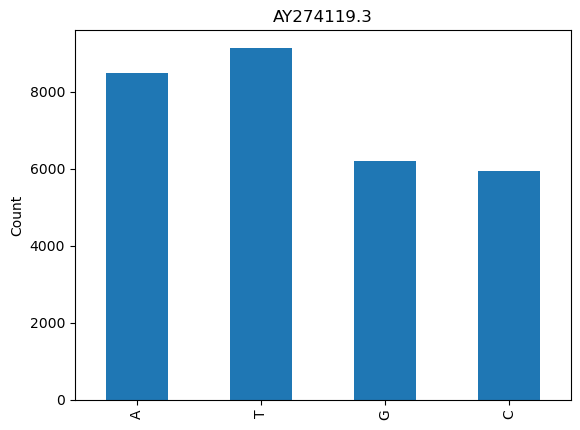

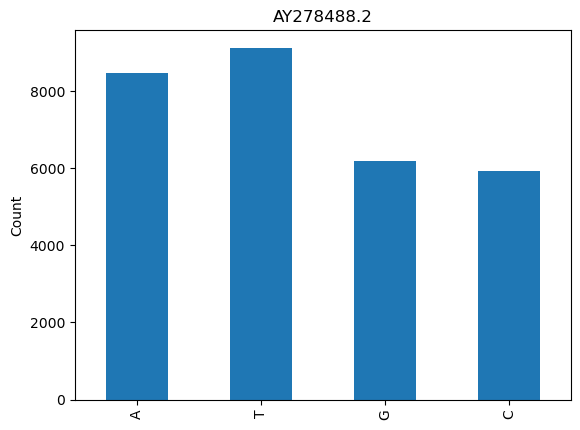

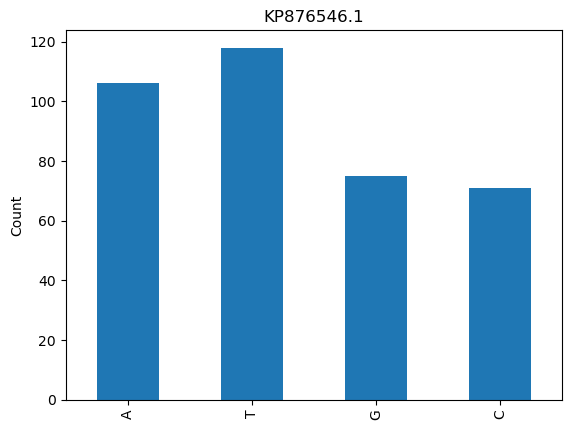

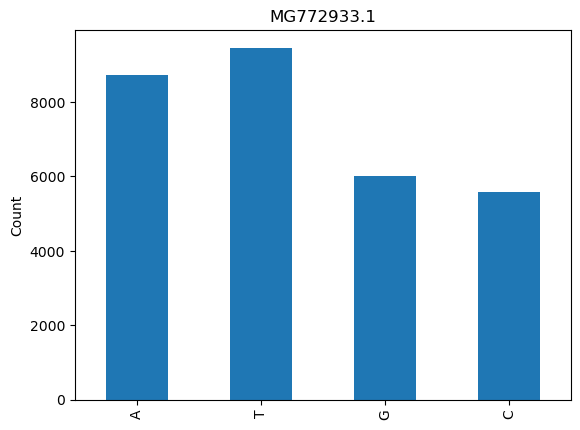

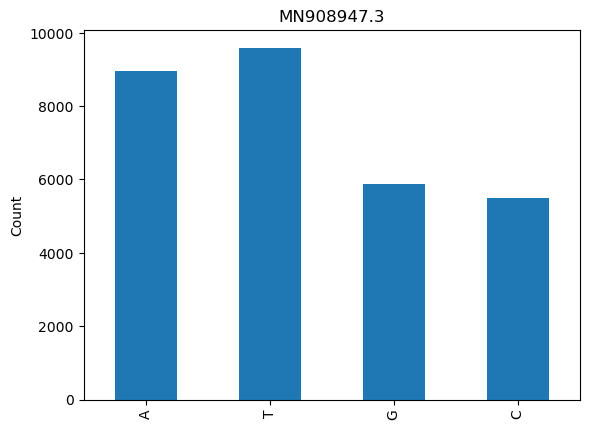

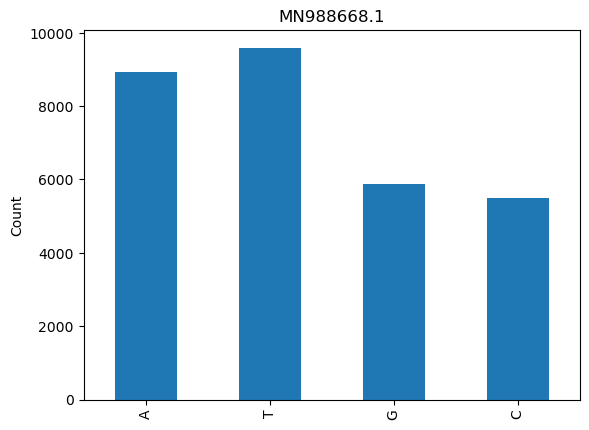

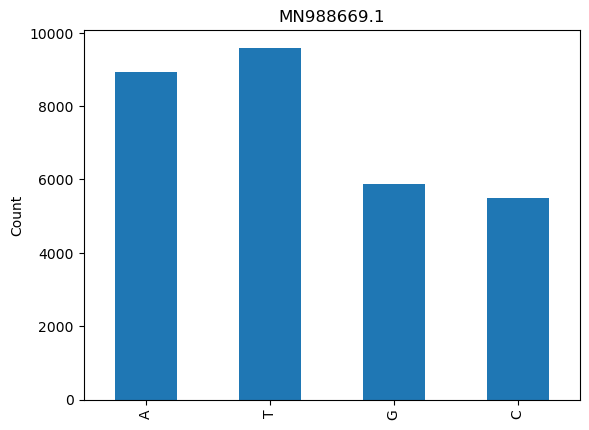

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate nucleotide frequencies and plot for each genome
for id, seq in sequences.items():
    nucleotide_freq = pd.Series(dict((base, str(seq).count(base)) for base in 'ATGC'))
    nucleotide_freq.plot(kind='bar', title=id)
    plt.ylabel('Count')
    plt.show()

In [ ]:
from Bio.SeqUtils import CodonUsage

# Function to calculate codon usage
def calculate_codon_usage(seq):
    codon_usage = CodonUsage.CodonsDict
    for i in range(0, len(seq), 3):
        codon = seq[i:i+3]
        if codon in codon_usage:
            codon_usage[codon] += 1
    return codon_usage

# Calculate codon usage for each genome
codon_usages = {}
for id, seq in sequences.items():
    codon_usages[id] = calculate_codon_usage(seq)

# Print the codon usage for each genome
for id, codon_usage in codon_usages.items():
    print(f'ID: {id}')
    print('Codon usage:', dict(sorted(codon_usage.items(), key=lambda item: item[1], reverse=True)))

ID: AY274119.3
Codon usage: {'TTT': 1844, 'AAA': 1756, 'ATG': 1709, 'TTG': 1652, 'ACA': 1644, 'TTA': 1608, 'AAT': 1571, 'ATT': 1545, 'GTT': 1513, 'TGT': 1505, 'ACT': 1477, 'CTT': 1474, 'CAA': 1378, 'GCT': 1311, 'TAT': 1209, 'GAA': 1204, 'AAG': 1193, 'TCA': 1188, 'TCT': 1176, 'GGT': 1129, 'TAC': 1126, 'AAC': 1120, 'CTA': 1100, 'GTG': 1092, 'CTG': 1074, 'AGA': 1030, 'TTC': 1016, 'TAA': 996, 'GAT': 996, 'ATA': 987, 'AGT': 957, 'GTA': 950, 'TGC': 939, 'CAT': 936, 'TGA': 921, 'CAG': 914, 'TGG': 913, 'GCA': 910, 'CAC': 869, 'GAC': 789, 'CCA': 769, 'CCT': 743, 'GAG': 741, 'ACC': 737, 'ATC': 667, 'AGG': 661, 'TAG': 655, 'CTC': 637, 'GGA': 596, 'GTC': 582, 'AGC': 547, 'GGC': 471, 'GCC': 421, 'TCC': 392, 'CGT': 390, 'ACG': 305, 'TCG': 279, 'GGG': 251, 'CCC': 240, 'GCG': 238, 'CGC': 214, 'CGA': 208, 'CCG': 155, 'CGG': 149}
ID: AY278488.2
Codon usage: {'TTT': 1844, 'AAA': 1756, 'ATG': 1709, 'TTG': 1652, 'ACA': 1644, 'TTA': 1608, 'AAT': 1571, 'ATT': 1545, 'GTT': 1513, 'TGT': 1505, 'ACT': 1477, 'CTT

In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Function to calculate amino acid composition
def calculate_aa_composition(seq):
    protein_seq = seq.translate()
    analysis = ProteinAnalysis(str(protein_seq))
    aa_composition = analysis.count_amino_acids()
    return aa_composition

# Calculate amino acid composition for each genome
aa_compositions = {}
for id, seq in sequences.items():
    aa_compositions[id] = calculate_aa_composition(seq)

# Print the amino acid composition for each genome
for id, aa_composition in aa_compositions.items():
    print(f'ID: {id}')
    print('Amino acid composition:', aa_composition)

ID: AY274119.3
Amino acid composition: {'A': 575, 'C': 313, 'D': 320, 'E': 365, 'F': 437, 'G': 438, 'H': 298, 'I': 566, 'K': 503, 'L': 1368, 'M': 365, 'N': 418, 'P': 314, 'Q': 388, 'R': 417, 'S': 737, 'T': 689, 'V': 683, 'W': 110, 'Y': 341}
ID: AY278488.2
Amino acid composition: {'A': 343, 'C': 564, 'D': 158, 'E': 199, 'F': 429, 'G': 274, 'H': 379, 'I': 470, 'K': 414, 'L': 1427, 'M': 261, 'N': 334, 'P': 316, 'Q': 402, 'R': 552, 'S': 836, 'T': 644, 'V': 614, 'W': 220, 'Y': 345}
ID: KP876546.1
Amino acid composition: {'A': 12, 'C': 6, 'D': 6, 'E': 4, 'F': 5, 'G': 6, 'H': 5, 'I': 2, 'K': 5, 'L': 12, 'M': 4, 'N': 9, 'P': 1, 'Q': 3, 'R': 8, 'S': 10, 'T': 8, 'V': 10, 'W': 0, 'Y': 7}
ID: MG772933.1
Amino acid composition: {'A': 509, 'C': 330, 'D': 299, 'E': 371, 'F': 452, 'G': 399, 'H': 303, 'I': 593, 'K': 510, 'L': 1360, 'M': 340, 'N': 448, 'P': 314, 'Q': 356, 'R': 413, 'S': 732, 'T': 699, 'V': 748, 'W': 122, 'Y': 347}
ID: MN908947.3
Amino acid composition: {'A': 375, 'C': 635, 'D': 290, 'E'

In [ ]:
# Function to calculate sequence similarity
def calculate_similarity(seq1, seq2):
    matches = sum(1 for a, b in zip(seq1, seq2) if a == b)
    return matches / min(len(seq1), len(seq2)) * 100

# Calculate sequence similarity for each pair of genomes
similarities = {}
for id1, seq1 in sequences.items():
    for id2, seq2 in sequences.items():
        if id1 != id2:
            similarity = calculate_similarity(seq1, seq2)
            similarities[(id1, id2)] = similarity

# Print the sequence similarity for each pair of genomes
for ids, similarity in similarities.items():
    print(f'Similarity between {ids[0]} and {ids[1]}: {similarity:.2f}%')

Similarity between AY274119.3 and AY278488.2: 24.78%
Similarity between AY274119.3 and KP876546.1: 26.76%
Similarity between AY274119.3 and MG772933.1: 31.36%
Similarity between AY274119.3 and MN908947.3: 25.43%
Similarity between AY274119.3 and MN988668.1: 31.63%
Similarity between AY274119.3 and MN988669.1: 31.63%
Similarity between AY278488.2 and AY274119.3: 24.78%
Similarity between AY278488.2 and KP876546.1: 25.14%
Similarity between AY278488.2 and MG772933.1: 25.97%
Similarity between AY278488.2 and MN908947.3: 26.31%
Similarity between AY278488.2 and MN988668.1: 25.53%
Similarity between AY278488.2 and MN988669.1: 25.53%
Similarity between KP876546.1 and AY274119.3: 26.76%
Similarity between KP876546.1 and AY278488.2: 25.14%
Similarity between KP876546.1 and MG772933.1: 28.11%
Similarity between KP876546.1 and MN908947.3: 27.84%
Similarity between KP876546.1 and MN988668.1: 24.59%
Similarity between KP876546.1 and MN988669.1: 24.59%
Similarity between MG772933.1 and AY274119.3: 

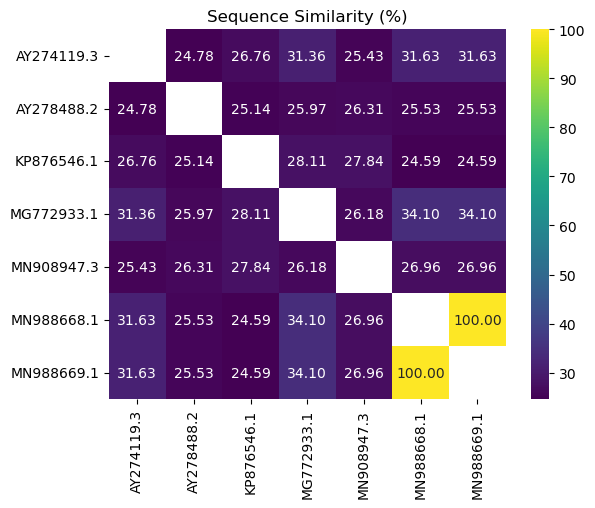

In [ ]:
import seaborn as sns

# Create a DataFrame for the sequence similarities
similarity_df = pd.DataFrame(index=sequences.keys(), columns=sequences.keys())
for ids, similarity in similarities.items():
    similarity_df.loc[ids[0], ids[1]] = similarity
    similarity_df.loc[ids[1], ids[0]] = similarity

# Create a heatmap for the sequence similarities
sns.heatmap(similarity_df.astype(float), annot=True, fmt='.2f', cmap='viridis')
plt.title('Sequence Similarity (%)')
plt.show()

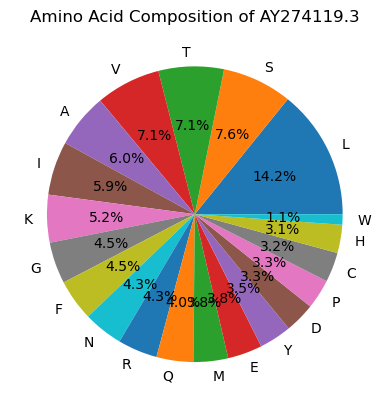

In [ ]:
# Create a pie chart for the amino acid composition of the first genome
aa_composition_series = pd.Series(aa_compositions['AY274119.3'])
aa_composition_series.sort_values(ascending=False, inplace=True)
aa_composition_series.plot(kind='pie', autopct='%1.1f%%')
plt.title('Amino Acid Composition of AY274119.3')
plt.ylabel('')
plt.show()

In [ ]:
import re

# Define the motif
motif = 'ATG'

# Function to find motifs in a sequence
def find_motifs(seq, motif):
    return [m.start() for m in re.finditer(motif, str(seq))]

# Find the motif in each genome
motif_locations = {}
for id, seq in sequences.items():
    motif_locations[id] = find_motifs(seq, motif)

# Print the number of motifs found in each genome
for id, locations in motif_locations.items():
    print(f'ID: {id}')
    print('Number of motifs found:', len(locations))

ID: AY274119.3
Number of motifs found: 776
ID: AY278488.2
Number of motifs found: 775
ID: KP876546.1
Number of motifs found: 14
ID: MG772933.1
Number of motifs found: 717
ID: MN908947.3
Number of motifs found: 725
ID: MN988668.1
Number of motifs found: 725
ID: MN988669.1
Number of motifs found: 725


In [ ]:
# Define the motif
motif = 'LLQY'

# Function to find motifs in a protein sequence
def find_protein_motifs(seq, motif):
    protein_seq = seq.translate()
    return [m.start() for m in re.finditer(motif, str(protein_seq))]

# Find the motif in each genome
protein_motif_locations = {}
for id, seq in sequences.items():
    protein_motif_locations[id] = find_protein_motifs(seq, motif)

# Print the number of motifs found in each genome
for id, locations in protein_motif_locations.items():
    print(f'ID: {id}')
    print('Number of motifs found:', len(locations))

ID: AY274119.3
Number of motifs found: 1
ID: AY278488.2
Number of motifs found: 1
ID: KP876546.1
Number of motifs found: 0
ID: MG772933.1
Number of motifs found: 1
ID: MN908947.3
Number of motifs found: 0
ID: MN988668.1
Number of motifs found: 1
ID: MN988669.1
Number of motifs found: 1


In [ ]:
# Define the motif
motif = 'GTNGTKR'

# Find the motif in each genome
protein_motif_locations = {}
for id, seq in sequences.items():
    protein_motif_locations[id] = find_protein_motifs(seq, motif)

# Print the number of motifs found in each genome
for id, locations in protein_motif_locations.items():
    print(f'ID: {id}')
    print('Number of motifs found:', len(locations))

ID: AY274119.3
Number of motifs found: 0
ID: AY278488.2
Number of motifs found: 0
ID: KP876546.1
Number of motifs found: 0
ID: MG772933.1
Number of motifs found: 0
ID: MN908947.3
Number of motifs found: 0
ID: MN988668.1
Number of motifs found: 1
ID: MN988669.1
Number of motifs found: 1
